# MTMT co-authorship Network

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
import pathlib
import glob

import json

import networkx as nx

import re
import uuid

In [2]:
file = open("data/publication2.json","rt",encoding="utf-8")
data = json.load(file)

file.close()

In [3]:
data.keys()

dict_keys(['labelLang', 'responseDate', 'paging', 'content'])

In [4]:
len(data['content'])

5000

In [5]:
for i in data['content'][0].keys():
    print(i)

otype
mtid
status
published
unhandledTickets
deleted
lastRefresh
lastModified
created
creator
lastDuplumOK
lastDuplumSearch
validated
validator
core
citation
publicationPending
type
subType
category
languages
firstAuthor
authorships
title
identifiers
journal
volume
issue
internalId
firstPageOrInternalIdForSort
pageLength
publishedYear
abstractText
subjects
keywords
digital
printed
sourceYear
foreignEdition
foreignLanguage
fullPublication
conferencePublication
nationalOrigin
missingAuthor
oaType
oaCheckDate
oaFree
oaLink
citationCount
citationCountUnpublished
citationCountWoOther
independentCitCountWoOther
nationalOriginCitationCount
foreignEditionCitationCount
doiCitationCount
wosCitationCount
scopusCitationCount
wosScopusCitationCount
wosScopusCitationCountWoOther
wosScopusIndependentCitationCount
wosScopusIndependentCitationCountWoOther
independentCitationCount
selfCitationCount
unhandledCitationCount
citingPubCount
independentCitingPubCount
citingPubCountWoOther
independentCitingPub

In [6]:
print(len(data['content']))

5000


In [7]:
data['content'][0]['label']

'Aad G et al. Search for exotic decays of the Higgs boson into long-lived particles in pp collisions at root s=13 TeV using displaced vertices in the ATLAS inner detector. (2021) JOURNAL OF HIGH ENERGY PHYSICS 1126-6708 1029-8479 2021 11'

In [8]:
data['content'][0]['published']

True

In [9]:
data['content'][0].keys()

dict_keys(['otype', 'mtid', 'status', 'published', 'unhandledTickets', 'deleted', 'lastRefresh', 'lastModified', 'created', 'creator', 'lastDuplumOK', 'lastDuplumSearch', 'validated', 'validator', 'core', 'citation', 'publicationPending', 'type', 'subType', 'category', 'languages', 'firstAuthor', 'authorships', 'title', 'identifiers', 'journal', 'volume', 'issue', 'internalId', 'firstPageOrInternalIdForSort', 'pageLength', 'publishedYear', 'abstractText', 'subjects', 'keywords', 'digital', 'printed', 'sourceYear', 'foreignEdition', 'foreignLanguage', 'fullPublication', 'conferencePublication', 'nationalOrigin', 'missingAuthor', 'oaType', 'oaCheckDate', 'oaFree', 'oaLink', 'citationCount', 'citationCountUnpublished', 'citationCountWoOther', 'independentCitCountWoOther', 'nationalOriginCitationCount', 'foreignEditionCitationCount', 'doiCitationCount', 'wosCitationCount', 'scopusCitationCount', 'wosScopusCitationCount', 'wosScopusCitationCountWoOther', 'wosScopusIndependentCitationCount',

In [74]:
list(data['content'][0].keys())[47]

'oaLink'

In [79]:
for i in np.arange(35,len(list(data['content'][0].keys()))):
    print(list(data['content'][0].keys())[i], "\n\t" , data['content'][0][list(data['content'][0].keys())[i]])

digital 
	 None
printed 
	 None
sourceYear 
	 2022
foreignEdition 
	 True
foreignLanguage 
	 True
fullPublication 
	 True
conferencePublication 
	 False
nationalOrigin 
	 True
missingAuthor 
	 False
oaType 
	 GOLD
oaCheckDate 
	 2022-02-09
oaFree 
	 True
oaLink 
	 https://doi.org/10.1007%2FJHEP11%282021%29229
citationCount 
	 0
citationCountUnpublished 
	 0
citationCountWoOther 
	 0
independentCitCountWoOther 
	 0
nationalOriginCitationCount 
	 0
foreignEditionCitationCount 
	 0
doiCitationCount 
	 0
wosCitationCount 
	 0
scopusCitationCount 
	 0
wosScopusCitationCount 
	 0
wosScopusCitationCountWoOther 
	 0
wosScopusIndependentCitationCount 
	 0
wosScopusIndependentCitationCountWoOther 
	 0
independentCitationCount 
	 0
selfCitationCount 
	 0
unhandledCitationCount 
	 0
citingPubCount 
	 0
independentCitingPubCount 
	 0
citingPubCountWoOther 
	 0
independentCitingPubCountWoOther 
	 0
unhandledCitingPubCount 
	 0
citedPubCount 
	 1
citedCount 
	 1
ratings 
	 [{'otype': 'SjrRating', 'mt

In [69]:
data['content'][0][list(data['content'][0].keys())[26]]

0

In [10]:
data['content'][0]['title']

'Search for exotic decays of the Higgs boson into long-lived particles in pp collisions at root s=13 TeV using displaced vertices in the ATLAS inner detector'

In [11]:
data['responseDate']

'2022-02-17 13:33'

In [12]:
data['paging']

{'last': True,
 'first': True,
 'totalPages': 1,
 'totalElements': 5000,
 'totalEstimatedElements': 110000,
 'size': 5000,
 'number': 1,
 'numberOfElements': 5000,
 'sort': [{'direction': 'DESC',
   'property': 'publishedYear',
   'ascending': False},
  {'direction': 'ASC', 'property': 'firstAuthor', 'ascending': True}]}

In [13]:
print(data['content'][0]['authorships'][0]['mtid'])
print(data['content'][0]['authorships'][0]['givenName'])
print(data['content'][0]['authorships'][0]['familyName'])
print(data['content'][0]['authorships'][0]['label'])

99807928
G
Aad
Aad, G


In [14]:
data['content'][34]['authorships'][0]

{'otype': 'PersonAuthorship',
 'mtid': 95886196,
 'link': '/api/authorship/95886196',
 'label': 'Abdullah, S. Alshammari ✉ [Alshammari, Abdullah Saber (Educational science), szerző] Neveléstudományi Doktori Iskola (SZTE / DI)',
 'listPosition': 1,
 'share': 0.33333334,
 'first': True,
 'last': False,
 'corresponding': True,
 'author': {'otype': 'Author',
  'mtid': 10064710,
  'link': '/api/author/10064710',
  'label': 'Alshammari Abdullah Saber (Educational science)',
  'familyName': 'Alshammari',
  'givenName': 'Abdullah Saber',
  'published': True,
  'oldId': 10064710,
  'snippet': True},
 'familyName': 'Abdullah',
 'givenName': 'S. Alshammari',
 'authorTyped': True,
 'editorTyped': False,
 'otherTyped': False,
 'type': {'otype': 'AuthorshipType',
  'mtid': 1,
  'link': '/api/authorshiptype/1',
  'label': 'Szerző',
  'code': 0,
  'published': True,
  'oldId': 0,
  'snippet': True},
 'published': False,
 'snippet': True}

In [15]:
data['content'][0]['authorships'][0]

{'otype': 'PersonAuthorship',
 'mtid': 99807928,
 'link': '/api/authorship/99807928',
 'label': 'Aad, G',
 'listPosition': 1,
 'share': 0.0,
 'first': True,
 'last': False,
 'corresponding': False,
 'familyName': 'Aad',
 'givenName': 'G',
 'authorTyped': True,
 'editorTyped': False,
 'otherTyped': False,
 'type': {'otype': 'AuthorshipType',
  'mtid': 1,
  'link': '/api/authorshiptype/1',
  'label': 'Szerző',
  'code': 0,
  'published': True,
  'oldId': 0,
  'snippet': True},
 'published': False,
 'snippet': True}

In [16]:
temp_mem = []

for i in range(len(data['content'][0]['authorships'])):
    temp_mem.append(data['content'][0]['authorships'][i]['share'])

In [17]:
np.unique(temp_mem)

array([0.])

They are rather inconsistent in how well these object are defined.

In [18]:
110000/5000

22.0

In [19]:
sub_mem = []
for i in range(len(data['content'])):
    sub_mem.append(len(data['content'][i]['authorships']))
sub_mem = np.array(sub_mem)

In [20]:
print(np.mean(sub_mem), "+/-", np.var(sub_mem)**(1/2))

19.9854 +/- 187.9649701057088


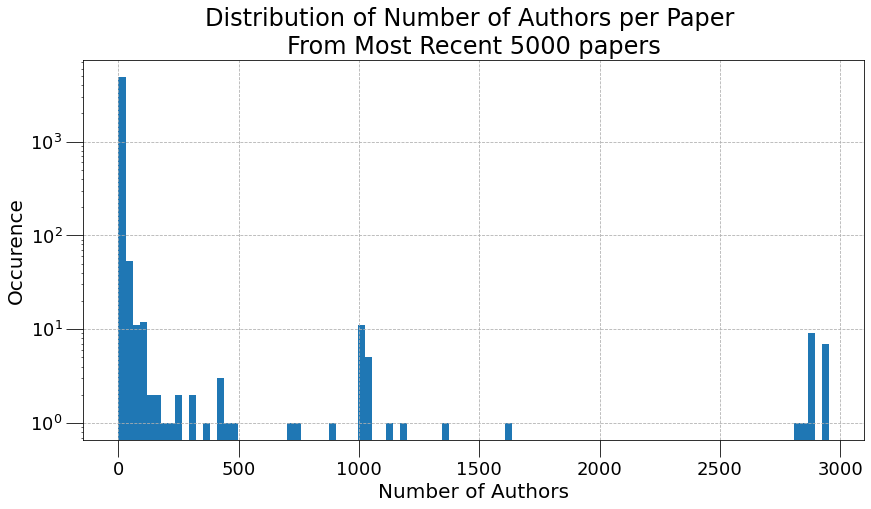

In [21]:
plt.figure(figsize=(14,7))

plt.title("Distribution of Number of Authors per Paper \nFrom Most Recent 5000 papers", fontsize=24)

plt.hist(sub_mem, bins=101)

plt.xlabel("Number of Authors", fontsize=20)
plt.ylabel("Occurence", fontsize=20)
plt.tick_params(labelsize=18,axis="both",size=17)

plt.yscale("log")
plt.grid(linestyle="--")

plt.savefig("figs/dist_from_5000sample.pdf",format="pdf",bbox_inches="tight")
plt.show()

## How to store tables?

How should i store the linklist and the decoding?

| startNode | endNode | time | weight |
| --- | --- | --- | --- |
| author1.mtid | author2.mtid | yearOfpublication | 0.01 |
| author1.mtid | author3.mtid | yearOfpublication | 0.1 |
| ... | ... | ... | ... |

This template may work, but its not good if the `mtid` is not unique to a given author -> might need to test this!

For the decoding table, the given table should be sufficient:

| number | Name |
| --- | --- |
| 56 | Adam G. Taylor |
| ... | ... |

Some modifications: rather than storing uuids as strings, I switched to using integers (namely numpy's uint32 bit integers) which requires (which is a correct looking estimate):

In [22]:
str(170000000 * 4 /1024 / 1024) + ' MB'

'648.49853515625 MB'

In [23]:
temp_mem = []
r = re.compile(r"\s+", re.MULTILINE)
count = 0
for i in range(len(data['content'])):
    for j in range(len(data['content'][i]['authorships'])):
        if (data['content'][i]['authorships'][j]['otype'] == 'PersonAuthorship'):
            string_to_add = '' 
            if 'givenName' in data['content'][i]['authorships'][j]:
                string_to_add += str(data['content'][i]['authorships'][j]['givenName']) + ' '
            if 'familyName' in data['content'][i]['authorships'][j]:
                string_to_add += str(data['content'][i]['authorships'][j]['familyName'])
            temp_mem.append(r.sub("",string_to_add))
            
        
temp_mem = list(np.unique(temp_mem))
temp_mem = dict(zip(temp_mem, np.array(np.arange(len(temp_mem)),dtype=np.uint32 )) ) 

In [24]:
temp_mem

{'A-EErson-Bensan': 0,
 'A.-M.Bachmann': 1,
 'A.A.Abud': 2,
 'A.A.Affolder': 3,
 'A.A.Capon': 4,
 'A.A.Ciobanu': 5,
 'A.A.Elliot': 6,
 'A.A.Galakhova': 7,
 'A.A.Geanta': 8,
 'A.A.Gorn': 9,
 'A.A.Grillo': 10,
 'A.A.Minaenko': 11,
 'A.A.Myers': 12,
 'A.A.P.Jimenez': 13,
 'A.A.P.Suaide': 14,
 'A.A.Pabon': 15,
 'A.A.Snesarev': 16,
 'A.A.Solodkov': 17,
 'A.A.Sztuc': 18,
 'A.A.Talyshev': 19,
 'A.AbedAbud': 20,
 'A.Adams': 21,
 'A.Adeboye': 22,
 'A.Adiguzel': 23,
 'A.Adler': 24,
 'A.Aggarwal': 25,
 'A.Ahmad': 26,
 'A.Ain': 27,
 'A.Akindinov': 28,
 'A.Al-awar': 29,
 'A.Albert': 30,
 'A.Alegro': 31,
 'A.Alfonsi': 32,
 'A.Algora': 33,
 'A.Ali': 34,
 'A.Alici': 35,
 'A.Alimkhanova': 36,
 'A.Alkin': 37,
 'A.Allocca': 38,
 'A.Aloisio': 39,
 'A.Alonso': 40,
 'A.Alunno': 41,
 'A.Amato': 42,
 'A.Ambler': 43,
 'A.Ananyeva': 44,
 'A.Anderson': 45,
 'A.Andics': 46,
 'A.Andreazza': 47,
 'A.Andronic': 48,
 'A.Angerami': 49,
 'A.Anjam': 50,
 'A.Annovi': 51,
 'A.Arance': 52,
 'A.Aratari': 53,
 'A.Arcones': 5

So there are `32220` unique authors, now having their somewhat correct names.

In [25]:
"""
THIS IS AN ARTIFACT

    -> HEAVY MEMORY USAGE WITH LINKLIST CONTAINING UUIDS AS STRINGS!

temp_mem = []
temp_link_list = []
r = re.compile(r"\s+", re.MULTILINE)

count = 0
for i in range(len(data['content'])):
    if (i+1) % 10 == 0:
        sys.stdout.write("\r {0} / {1}".format(i+1,len(data['content'])))
        sys.stdout.flush()
    content_mem = []
    for j in range(len(data['content'][i]['authorships'])):
        
        if (data['content'][i]['authorships'][j]['otype'] == 'PersonAuthorship'):
            name_to_add = ''
            string_to_add = '' 
            #using label is not advised due to special characters and its most likely have education description
            #if the field extists, get the name! -> what if none of them exists?
            if 'givenName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['givenName']) + ' '
            if 'familyName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['familyName'])
            
            #uuid_encoded = str(uuid.uuid5( uuid.NAMESPACE_DNS,r.sub("",name_to_add) ) ) -> takes up too much space
            string_to_add += name_to_add + ', '
            string_to_add += uuid_encoded + ', '
            string_to_add += str(data['content'][i]['publishedYear'])
            content_mem.append(uuid_encoded)
            temp_mem.append(string_to_add)
            
    if (len(content_mem) > 0):
        for j in range(len(content_mem)):
            for k in np.arange(i+1,len(content_mem)):
                temp_link_list.append([content_mem[j],content_mem[k]])
                
"""

'\nTHIS IS AN ARTIFACT\n\n    -> HEAVY MEMORY USAGE WITH LINKLIST CONTAINING UUIDS AS STRINGS!\n\ntemp_mem = []\ntemp_link_list = []\nr = re.compile(r"\\s+", re.MULTILINE)\n\ncount = 0\nfor i in range(len(data[\'content\'])):\n    if (i+1) % 10 == 0:\n        sys.stdout.write("\r {0} / {1}".format(i+1,len(data[\'content\'])))\n        sys.stdout.flush()\n    content_mem = []\n    for j in range(len(data[\'content\'][i][\'authorships\'])):\n        \n        if (data[\'content\'][i][\'authorships\'][j][\'otype\'] == \'PersonAuthorship\'):\n            name_to_add = \'\'\n            string_to_add = \'\' \n            #using label is not advised due to special characters and its most likely have education description\n            #if the field extists, get the name! -> what if none of them exists?\n            if \'givenName\' in data[\'content\'][i][\'authorships\'][j]:\n                name_to_add += str(data[\'content\'][i][\'authorships\'][j][\'givenName\']) + \' \'\n            if \

In [26]:
len(np.unique(temp_mem)), len(temp_mem)

(1, 31149)

In [27]:
_,app_count = np.unique(temp_mem, return_counts=True)
np.unique(app_count, return_counts=True)

(array([1], dtype=int64), array([1], dtype=int64))

In [28]:
_,app_count = np.unique(temp_mem2, return_counts=True)
np.unique(app_count, return_counts=True)

NameError: name 'temp_mem2' is not defined

Sooooo, `mtid` is unique to the creation of such object...

Old trick: use their name as a source for the uuid to hide their identity, while it is deterministic. The logic of choosing a uuid will be hidden though.

In [30]:
data['content'][0]['authorships'][0]

{'otype': 'PersonAuthorship',
 'mtid': 99807928,
 'link': '/api/authorship/99807928',
 'label': 'Aad, G',
 'listPosition': 1,
 'share': 0.0,
 'first': True,
 'last': False,
 'corresponding': False,
 'familyName': 'Aad',
 'givenName': 'G',
 'authorTyped': True,
 'editorTyped': False,
 'otherTyped': False,
 'type': {'otype': 'AuthorshipType',
  'mtid': 1,
  'link': '/api/authorshiptype/1',
  'label': 'Szerző',
  'code': 0,
  'published': True,
  'oldId': 0,
  'snippet': True},
 'published': False,
 'snippet': True}

## UUID.UUID5 for hiding information ( Removed )

I will be using uuid.uuid5 for hidin information to hide personal information for the sake of clean analysis. Later on we can insert such information back, take a look at it and draw conclusions.

In [31]:
print(uuid.uuid5(uuid.NAMESPACE_DNS,(data['content'][0]['authorships'][0]['givenName'] +
                                     ' ' +
                                     data['content'][0]['authorships'][0]['familyName'])))

61977f7f-ec8f-5de5-8a2f-e476a11c4455


In [32]:
"""
temp_mem = []
temp_link_list = []
r = re.compile(r"\s+", re.MULTILINE)

count = 0
for i in range(len(data['content'])):
    if (i+1) % 10 == 0:
        sys.stdout.write("\r {0} / {1}".format(i+1,len(data['content'])))
        sys.stdout.flush()
    content_mem = []
    for j in range(len(data['content'][i]['authorships'])):
        
        if (data['content'][i]['authorships'][j]['otype'] == 'PersonAuthorship'):
            name_to_add = ''
            string_to_add = '' 
            #if the field extists, get the name! -> what if none of them exists?
            if 'givenName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['givenName']) + ' '
            if 'familyName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['familyName'])
            
            uuid_encoded = str(uuid.uuid5( uuid.NAMESPACE_DNS,r.sub("",name_to_add) ) )
            string_to_add += name_to_add + ', '
            string_to_add += uuid_encoded + ', '
            string_to_add += str(data['content'][i]['publishedYear'])
            content_mem.append(uuid_encoded)
            temp_mem.append(string_to_add)
            
    if (len(content_mem) > 0):
        for j in range(len(content_mem)):
            for k in np.arange(i+1,len(content_mem)):
                temp_link_list.append([content_mem[j],content_mem[k]])
"""

'\ntemp_mem = []\ntemp_link_list = []\nr = re.compile(r"\\s+", re.MULTILINE)\n\ncount = 0\nfor i in range(len(data[\'content\'])):\n    if (i+1) % 10 == 0:\n        sys.stdout.write("\r {0} / {1}".format(i+1,len(data[\'content\'])))\n        sys.stdout.flush()\n    content_mem = []\n    for j in range(len(data[\'content\'][i][\'authorships\'])):\n        \n        if (data[\'content\'][i][\'authorships\'][j][\'otype\'] == \'PersonAuthorship\'):\n            name_to_add = \'\'\n            string_to_add = \'\' \n            #if the field extists, get the name! -> what if none of them exists?\n            if \'givenName\' in data[\'content\'][i][\'authorships\'][j]:\n                name_to_add += str(data[\'content\'][i][\'authorships\'][j][\'givenName\']) + \' \'\n            if \'familyName\' in data[\'content\'][i][\'authorships\'][j]:\n                name_to_add += str(data[\'content\'][i][\'authorships\'][j][\'familyName\'])\n            \n            uuid_encoded = str(uuid.uuid5

In [33]:
#apps,app_count = np.unique(temp_mem, return_counts=True)
#c1,c2 = np.unique(app_count, return_counts=True)

#print(len(apps), len(c1),len(c2))

This makes it obvious that the encoded gives the same result as the not encoded, meaning that using their name is acceptable to create the decoding list and the linklist with dates included.

## NP.UINT32

To encode the list, this is more efficient compared to uuids as strings. Of course, the uuid generation is done on the fly, which is fast compared to searching for the encoding integer in an already existing array.

In [34]:
np.array(list(temp_mem.keys()))[np.array(list(temp_mem.keys())) == 'GAad']

array(['GAad'], dtype='<U47')

In [35]:
np.array(list(temp_mem.values()))

array([    0,     1,     2, ..., 31146, 31147, 31148], dtype=uint32)

In [36]:
data['content'][0]['authorships'][0]['givenName'] + data['content'][0]['authorships'][0]['familyName']

'GAad'

In [37]:
data['content'][0]['authorCount']

2870

In [38]:
_name_list = np.array(list(temp_mem.keys()))      #saving tables
_encoded_list = np.array(list(temp_mem.values())) 
temp_link_list = np.zeros((0,4), dtype=np.uint32) #burning in datatype
r = re.compile(r"\s+", re.MULTILINE)              #for stripping some stuff

count = 0
for i in range(len(data['content'])):
    if (i+1) % 10 == 0:
        sys.stdout.write("\r {0} / {1} # {2}".format(i+1,len(data['content']), len(temp_link_list)))
        sys.stdout.flush()
    content_mem = []
    for j in range(len(data['content'][i]['authorships'])):
        
        if (data['content'][i]['authorships'][j]['otype'] == 'PersonAuthorship'):
            name_to_add = ''
            string_to_add = '' 
            #if the field extists, get the name! -> what if none of them exists?
            if 'givenName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['givenName']) + ' '
            if 'familyName' in data['content'][i]['authorships'][j]:
                name_to_add += str(data['content'][i]['authorships'][j]['familyName'])
            name_to_add = r.sub("", name_to_add)
            _encoded = _encoded_list[_name_list == name_to_add]
            if len(_encoded) == 1:
                content_mem.append(_encoded[0])
            else:
                print("Wrong amount of authors: {} != 1 !".format(len(_encoded)))
            
    if (len(content_mem) > 0):
        tmp_mem = []     #save partial results as constans addition is not liked by numpy
        for j in range(len(content_mem)):
            for k in np.arange(j+1,len(content_mem)):
                tmp_mem.append([content_mem[j],content_mem[k],data['content'][i]['publishedYear'],data['content'][i]['authorCount']])
        if (len(tmp_mem) > 0): 
            temp_link_list = np.append(temp_link_list,
                                       tmp_mem,
                                       axis=0)
            
temp_link_list = np.array(temp_link_list, dtype=np.uint32)

 5000 / 5000 # 89197084

In [39]:
len(temp_link_list)

89197084

In [40]:
temp_link_list = np.array(temp_link_list, dtype=np.uint32)

In [41]:
temp_link_list[0]

array([10068,  3638,  2021,  2870], dtype=uint32)

In [42]:
len(temp_link_list)

89197084

In [43]:
len(temp_link_list) / len(apps)**2

NameError: name 'apps' is not defined

In [44]:
temp_link_list[:,0:2].shape

(89197084, 2)

In [45]:
len(temp_link_list[temp_link_list[:,3] < 200])

350046

**DO NOT SAVE IT IN THIS FORM!**

In [46]:
#np.savetxt('data/decoding_s_5000.csv', temp_mem, delimiter=",",fmt='%s',encoding="utf-8")
#np.savetxt('data/sample5000.csv', temp_link_list, delimiter=",",fmt='%s',encoding="utf-8")

This seems huge but... I don't think this is a bad or wrong result, because there are a couple of mass co-athor publiations, which comes with a fully connecter graph that is jus huge in itsef.

In [47]:
170000000 * 2 * 32 /1024 / 8 / 1024 / 1024

1.2665987014770508

In [48]:
638 * 1906 * 1060 * 3 * 2 / 1024 / 1024 / 1024

7.202791124582291

In [49]:
temp_link_list[:,0:2].flatten().shape

(178394168,)

## Degree Distribution

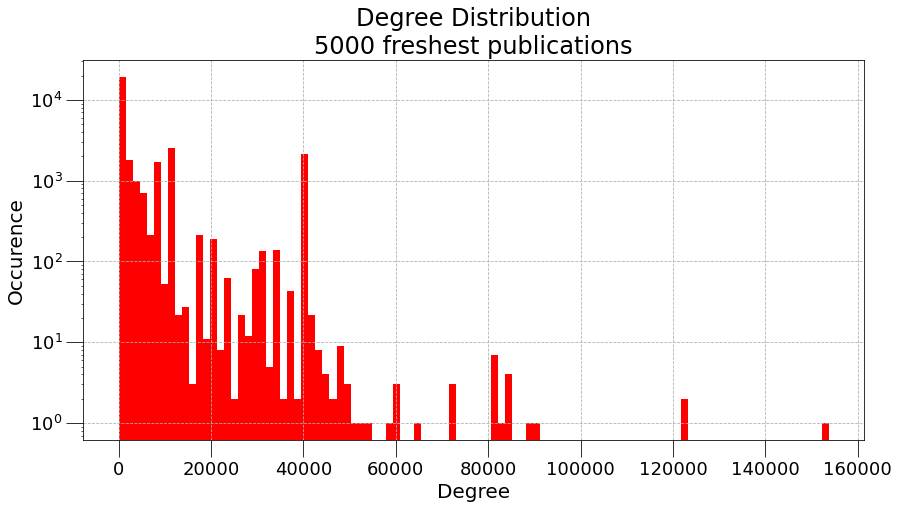

In [50]:
np.unique(temp_link_list[:,0:2].flatten())


plt.figure(figsize=(14,7))

plt.title("Degree Distribution\n5000 freshest publications", fontsize=24)

_, deg = np.unique(temp_link_list[:,0:2].flatten(), return_counts=True)
plt.hist(deg, bins=101, color="red")

plt.xlabel("Degree", fontsize=20)
plt.ylabel("Occurence", fontsize=20)
plt.tick_params(labelsize=18,axis="both",size=17)

plt.yscale("log")
plt.grid(linestyle="--")

plt.savefig("figs/k_dist_from_5000sample.pdf",format="pdf",bbox_inches="tight")
plt.show()

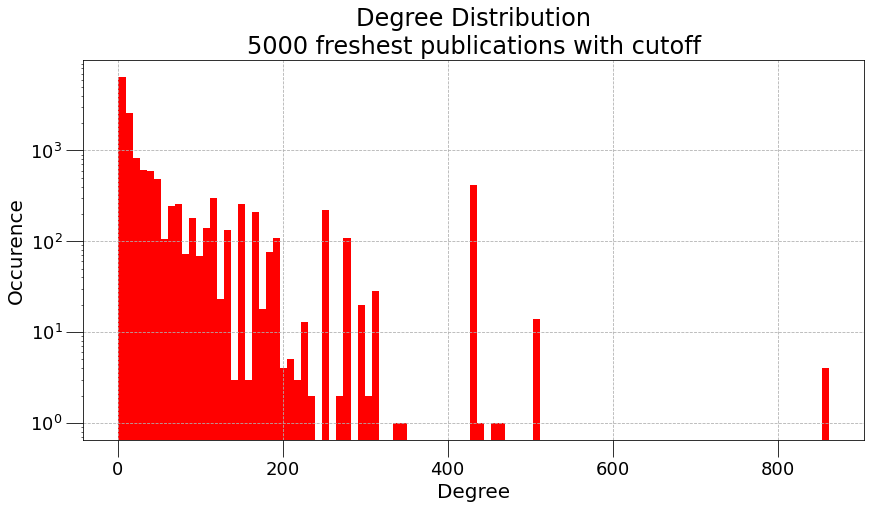

In [51]:
np.unique(temp_link_list[:,0:2].flatten())


plt.figure(figsize=(14,7))

plt.title("Degree Distribution\n5000 freshest publications with cutoff", fontsize=24)


_, deg = np.unique(temp_link_list[:,0:2][temp_link_list[:,3] < 200].flatten(), return_counts=True)
plt.hist(deg, bins=101, color="red")

plt.xlabel("Degree", fontsize=20)
plt.ylabel("Occurence", fontsize=20)
plt.tick_params(labelsize=18,axis="both",size=17)

plt.yscale("log")
plt.grid(linestyle="--")

plt.savefig("figs/k_dist_from_5000sample_cutoff.pdf",format="pdf",bbox_inches="tight")
plt.show()

Its interesting how it looks like it's scale-free, so the shape is retained even with the cutoff.

## Other data for network creation

Not only collaborating authorscan be connected together, but they can be connected to topics that they are like to "work in" or prefer.

### Subjects-author bipartite network

A subject is a topic that is general enough to not specify what it is about. Like `Physics`. Physics is about a lot of things while we generally understand when someone says "he studies physics". In this sense it can be understood as a general topic.

In [52]:
data['content'][0]['subjects']

[{'otype': 'Classification',
  'mtid': 10154,
  'link': '/api/classification/10154',
  'label': 'Fizika',
  'published': True,
  'snippet': True}]

In [53]:
subjects = []
sub_author_links = []
for i in range(len(data['content'])):
    for j in range(len(data['content'][i]['subjects'])):
        subjects.append(data['content'][i]['subjects'][j]['label'])
        
distinctSubs, dSubCount = np.unique(subjects, return_counts=True)
print("There are {} unique subjects, {} where found.".format(len(distinctSubs), len(subjects) ) )

distinctSubs = dict(zip(distinctSubs, np.arange(len(distinctSubs)) + 200000)) #arbitrarily choose a high number
Subs = np.array(list(distinctSubs.keys()))
_eSubs = np.array(list(distinctSubs.values()))

for i in range(len(data['content'])):
    if (i+1) % 10 == 0:
        sys.stdout.write("\r {0} / {1} # {2}".format(i+1,len(data['content']), len(sub_author_links)))
        sys.stdout.flush()
    for j in range(len(data['content'][i]['subjects'])):
        _s_encoded = _eSubs[data['content'][i]['subjects'][j]['label'] == Subs]
        for k in range(len(data['content'][i]['authorships'])):
            if (data['content'][i]['authorships'][k]['otype'] == 'PersonAuthorship'):
                name_to_add = ''
                string_to_add = '' 
                #if the field extists, get the name! -> what if none of them exists?
                if 'givenName' in data['content'][i]['authorships'][k]:
                    name_to_add += str(data['content'][i]['authorships'][k]['givenName']) + ' '
                if 'familyName' in data['content'][i]['authorships'][k]:
                    name_to_add += str(data['content'][i]['authorships'][k]['familyName'])
                name_to_add = r.sub("", name_to_add)
                _encoded = _encoded_list[_name_list == name_to_add]
                if len(_encoded) == 1:
                    sub_author_links.append([_encoded[0], _s_encoded[0]])
                    
                    
sub_author_links = np.array(sub_author_links, dtype=np.uint32)

There are 893 unique subjects, 9127 where found.
 5000 / 5000 # 117736

In [54]:
subjects_graph = nx.Graph()

subjects_graph.add_edges_from(sub_author_links)

In [55]:
pos0 = nx.spring_layout(subjects_graph,iterations=30) #limit the iteration -> at 20 it looks fine too

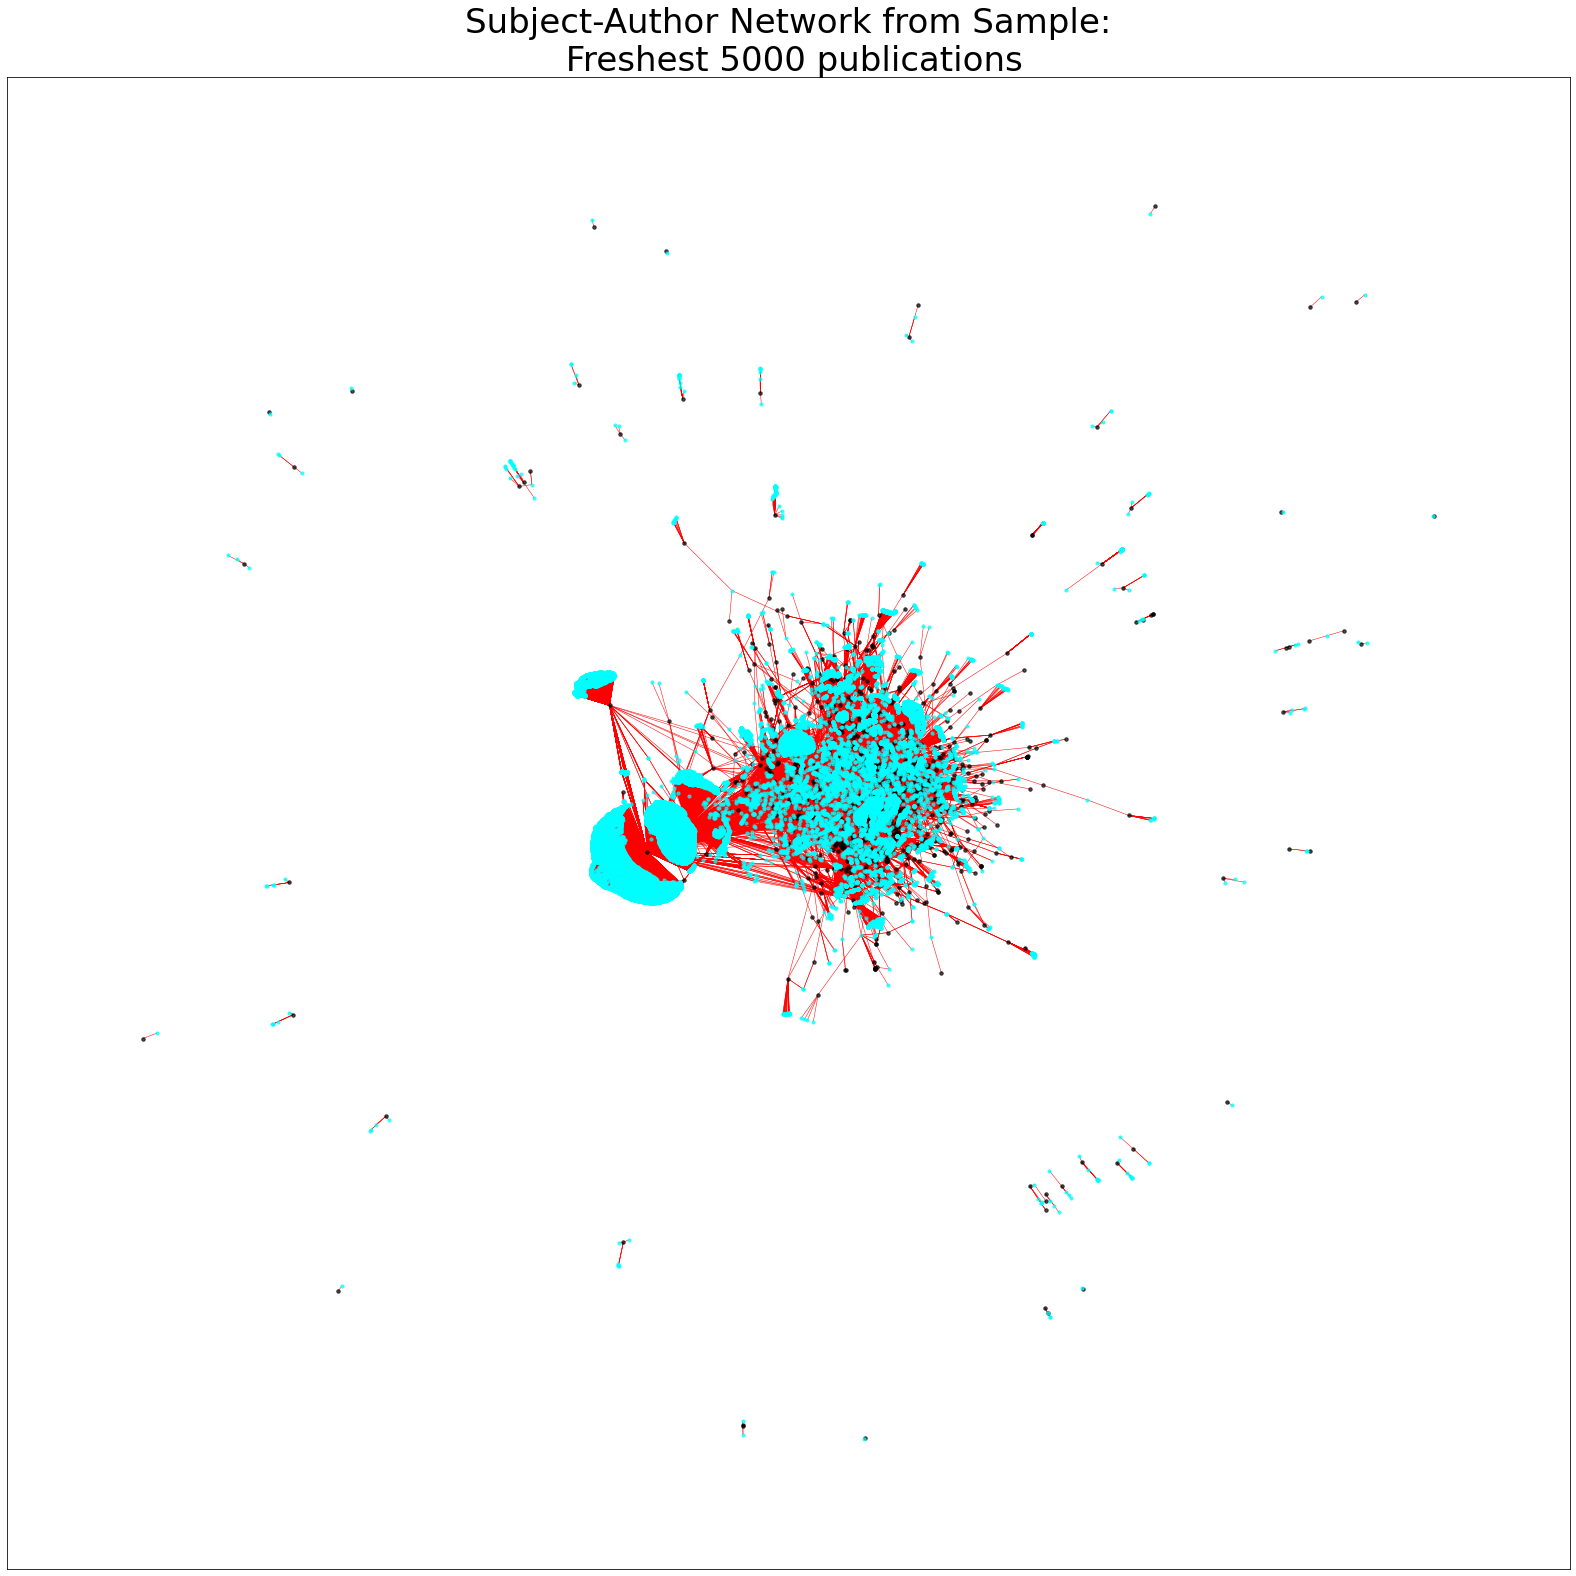

In [56]:
fig = plt.figure(figsize=(22,22))

plt.title("Subject-Author Network from Sample:\n Freshest 5000 publications", fontsize=34)

nx.draw_networkx_nodes(subjects_graph,
                      pos0,
                      nodelist = np.array(subjects_graph.nodes)[np.array(subjects_graph.nodes) > 199999],
                      node_size=12,
                      node_color='black',
                      alpha=0.7
                      )

nx.draw_networkx_nodes(subjects_graph,
                      pos0,
                      nodelist = np.array(subjects_graph.nodes)[np.array(subjects_graph.nodes) < 199999],
                      node_size=10,
                      node_color='cyan',
                      alpha=0.7
                      )

nx.draw_networkx_edges(subjects_graph,
                      pos0,
                      width=0.5,
                      edgelist=sub_author_links,
                      edge_color='r',
                      arrows=False)

fig.tight_layout()


plt.savefig("figs/subject_author_network_from_5000sample.pdf", format="pdf", bbox_inches="tight")

#needs some modifications, but starts to look acceptable

plt.show()

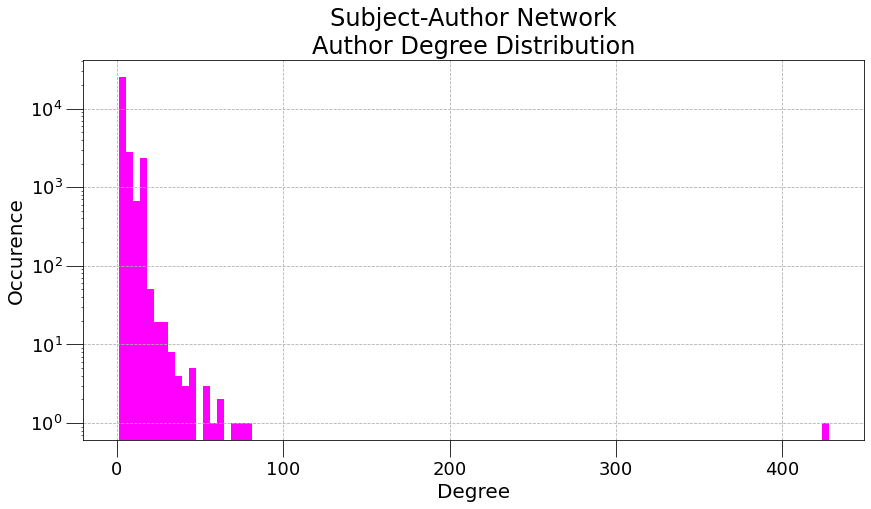

In [57]:
plt.figure(figsize=(14,7))

plt.title("Subject-Author Network\nAuthor Degree Distribution", fontsize=24)

_,degs = np.unique(sub_author_links[:,0], return_counts=True)
plt.hist(degs, bins=101, color="magenta")

plt.xlabel("Degree", fontsize=20)
plt.ylabel("Occurence", fontsize=20)
plt.tick_params(labelsize=18,axis="both",size=17)

plt.yscale("log")
plt.grid(linestyle="--")

plt.savefig("figs/2authofsub_auth_degreedist.pdf",format="pdf",bbox_inches="tight")
plt.show()

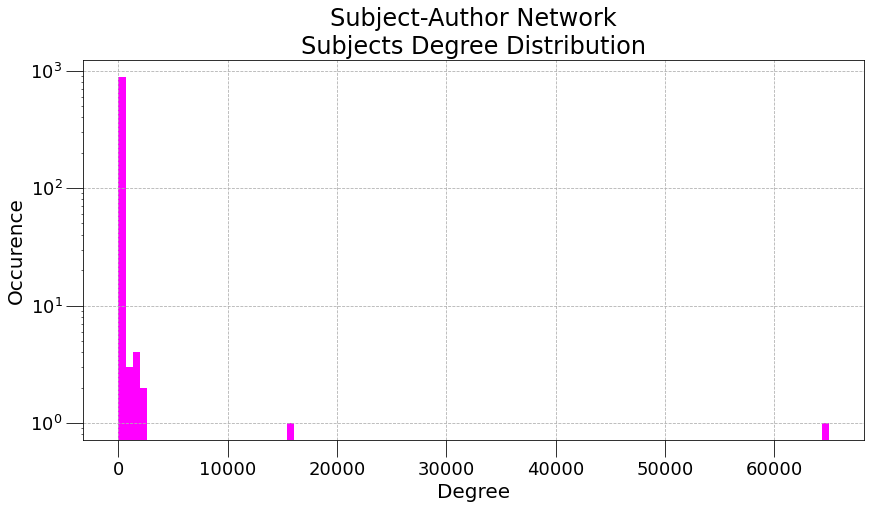

In [58]:
plt.figure(figsize=(14,7))

plt.title("Subject-Author Network\nSubjects Degree Distribution", fontsize=24)

_,degs = np.unique(sub_author_links[:,1], return_counts=True)
plt.hist(degs, bins=101, color="magenta")

plt.xlabel("Degree", fontsize=20)
plt.ylabel("Occurence", fontsize=20)
plt.tick_params(labelsize=18,axis="both",size=17)

plt.yscale("log")
plt.grid(linestyle="--")

plt.savefig("figs/2subofsub_auth_degreedist.pdf",format="pdf",bbox_inches="tight")
plt.show()

In [59]:
asd,degs = np.unique(sub_author_links[:,0], return_counts=True)
print(_name_list[asd[degs == max(degs)][0]])

ZoltánBabucs


In [60]:
atest = np.array([1,2,3,4,3,2])
print(np.argmax(atest))

3


### Keyword - author bipartite network

Obviously this makes less sense, but it is usable to know which extended topic is preferred by authors, its more specified, mor keywords can be present in this network. Filling out this field seems to be arbitrary compared to subjects, which is obligatory to be filled.

**Not doing it as it takes a huge amount of time to actually draw these networks... maybe later on**

In [61]:
data['content'][1]['keywords']

[{'otype': 'Keyword',
  'mtid': 1026050,
  'link': '/api/keyword/1026050',
  'label': 'dark matter',
  'published': True,
  'oldId': 1026050,
  'snippet': True},
 {'otype': 'Keyword',
  'mtid': 1109134,
  'link': '/api/keyword/1109134',
  'label': 'Pair production',
  'published': True,
  'oldId': 1109134,
  'snippet': True},
 {'otype': 'Keyword',
  'mtid': 1404870,
  'link': '/api/keyword/1404870',
  'label': 'Hadron-Hadron scattering (experiments)',
  'published': True,
  'oldId': 1404870,
  'snippet': True},
 {'otype': 'Keyword',
  'mtid': 1427623,
  'link': '/api/keyword/1427623',
  'label': 'PLUS PLUS',
  'published': True,
  'oldId': 1427623,
  'snippet': True}]

In [62]:
keywords = []
for i in range(len(data['content'])):
    if 'keywords' in data['content'][i].keys():
        for j in range(len(data['content'][i]['keywords'])):
            keywords.append(data['content'][i]['keywords'][j]['label'])
        
distinctKeys, dKeyCount = np.unique(keywords, return_counts=True)


print("There are {} unique subjects, {} where found.".format(len(distinctKeys), len(keywords) ) )
print(len(distinctKeys), distinctKeys[0:10])

There are 3012 unique subjects, 3360 where found.
3012 ["'Components model of addiction'" '(C, alpha(n)) means'
 '1 new combination' '14 new species' '1848. március 15' '1ST REPORT'
 '1ST STARS' '25(OH)-vitamin D' '3-interaction' '3D nyomtatás']


# Network Objects

Networkx for the win! I used it a couple of times, but rarely, meaning that I need a quic recap for it.

## Test Network initialized

In [63]:
test_graph = nx.Graph()

test_links = np.array([[1,2],
                       [2,3],
                       [1,3],
                       [4,4],
                      [5,5],
                      [6,6]])

test_graph.add_edges_from(test_links)

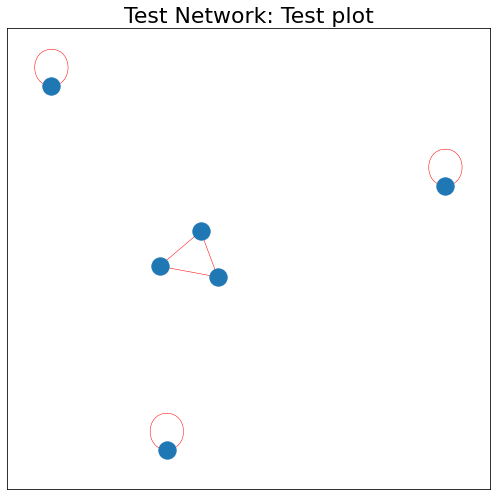

In [64]:
#test plot 
fig = plt.figure(figsize=(7,7))

plt.title("Test Network: Test plot", fontsize=22)

pos = nx.spring_layout(test_graph)

nx.draw_networkx_nodes(test_graph,
                      pos,
                      nodelist = np.array(test_graph.nodes)
                      )

nx.draw_networkx_edges(test_graph,
                      pos,
                      width=0.5,
                      edge_color='r',
                      arrows=False)
fig.tight_layout()

plt.show()

So I could, in theory, contain all authors from all publications, but seems **unnecessary**.

## Creating the network from temp_link_list

Its huge in size, its massive, will netx handle it? Probably not...

In [65]:
sample_graph = nx.Graph()

sample_graph.add_edges_from(temp_link_list[:,0:2][temp_link_list[:,3] < 200])

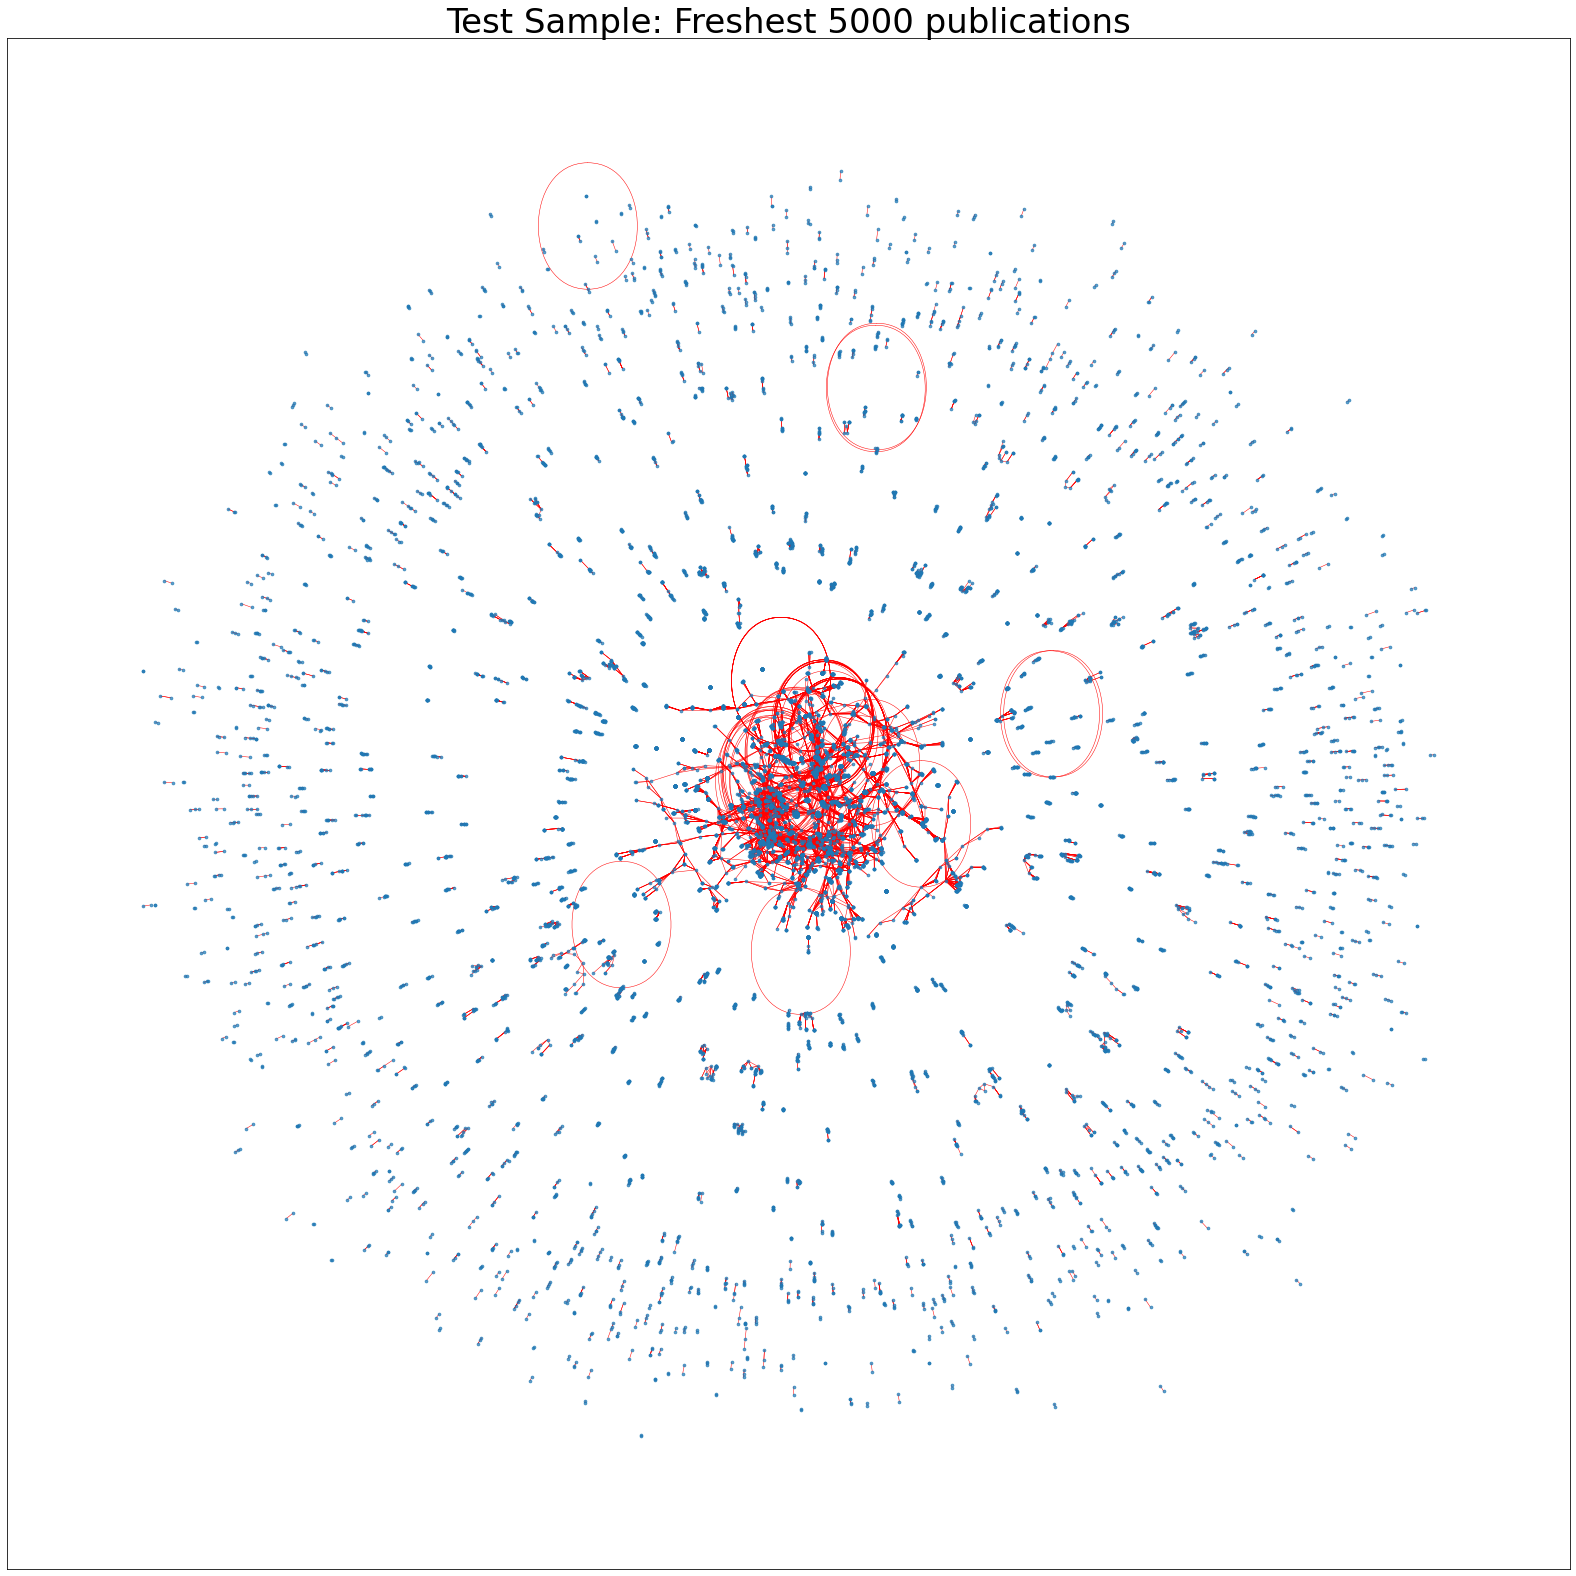

In [66]:
fig = plt.figure(figsize=(22,22))

plt.title("Test Sample: Freshest 5000 publications", fontsize=34)

pos = nx.spring_layout(sample_graph)

nx.draw_networkx_nodes(sample_graph,
                      pos,
                      nodelist = np.array(sample_graph.nodes),
                      node_size=7,
                      alpha=0.7
                      )

nx.draw_networkx_edges(sample_graph,
                      pos,
                      width=0.5,
                      edgelist=temp_link_list[:,0:2][temp_link_list[:,3] < 200],
                      edge_color='r',
                      arrows=False)

fig.tight_layout()

plt.savefig("figs/networkx_from_5000sample.pdf", format="pdf", bbox_inches="tight")

#needs some modifications, but starts to look acceptable

plt.show()

In [67]:
asd = np.unique(temp_mem)
print(len(asd))

1


In [68]:
sub_asd = []
for i in range(len(asd)):
    sub_asd.append(asd[i].split()[-2].replace(',',''))

AttributeError: 'dict' object has no attribute 'split'

Still not ghood enough fo memory -> going into number territory... (this got implemented)

In [89]:
import igraph

In [112]:
iSampleG = igraph.Graph()

iSampleG.add_vertices(sub_asd)
iSampleG.add_edges(temp_link_list)

MemoryError: Error at src/graph/type_indexededgelist.c:307: cannot add edges. -- Out of memory